# Titanic - Machine Learning from Disaster

Work for the [Kaggle Titanic ML competition](https://www.kaggle.com/c/titanic).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv('data/titanic_train.csv')
test = pd.read_csv('data/titanic_test.csv')
combined = [train, test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Cleaning data

In [5]:
for df in combined:

  mode_sex = df['Sex'].dropna().mode()[0]
  df['Sex'].fillna(mode_sex, inplace=True)
  df['Sex'] = df['Sex'].map({'male':0, 'female':1}).astype(int)

  mode_embark = df['Embarked'].dropna().mode()[0]
  df['Embarked'].fillna(mode_embark, inplace=True)
  df['Embarked'] = df['Embarked'].map({'C':0, 'Q':1, 'S':2}).astype(int)

  


In [6]:
train.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
test.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2


In [7]:
test['Fare'].fillna(test['Fare'].dropna().mean(), inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


In [9]:
age_estimate = np.zeros((3,2))

for df in combined:
  
  for pclass in range(0, 3):
    for sex in range(0, 2):
      est = df[(df['Pclass']==pclass+1) \
        & (df['Sex']==sex)]['Age'].dropna()
      age_estimate[pclass, sex] = est.median()
  
  for pclass in range(0, 3):
    for sex in range(0, 2):  
      df.loc[(df['Age'].isnull()) & (df['Pclass']==pclass+1) \
        & (df['Sex']==sex), 'Age'] = age_estimate[pclass, sex]
  
  df['Age'] = df['Age'].astype(int)

In [10]:
train.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,0,27,0,0,13.00,2
887,888,1,1,1,19,0,0,30.00,2
888,889,0,3,1,21,1,2,23.45,2
889,890,1,1,0,26,0,0,30.00,0
890,891,0,3,0,32,0,0,7.75,1


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    int32  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(1), int32(3), int64(5)
memory usage: 52.3 KB


In [12]:
train.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,0,27,0,0,13.00,2
887,888,1,1,1,19,0,0,30.00,2
888,889,0,3,1,21,1,2,23.45,2
889,890,1,1,0,26,0,0,30.00,0
890,891,0,3,0,32,0,0,7.75,1


In [13]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34,0,0,7.8292,1
1,893,3,1,47,1,0,7.0000,2
2,894,2,0,62,0,0,9.6875,1
3,895,3,0,27,0,0,8.6625,2
4,896,3,1,22,1,1,12.2875,2


<AxesSubplot:>

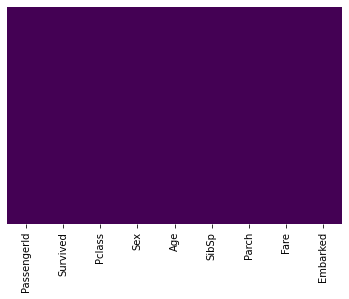

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

X = train.drop(['PassengerId', 'Survived'], axis=1)
y = train['Survived']

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [16]:
def for_notebook_output():

  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)
  
  logmodel = LogisticRegression(max_iter=100)
  logmodel.fit(X_train, y_train)
  pred = logmodel.predict(X_test)
  print(classification_report(y_test, pred))
  print(confusion_matrix(y_test, pred))

for_notebook_output()

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       144
           1       0.75      0.66      0.70        79

    accuracy                           0.80       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.80      0.80      0.80       223

[[127  17]
 [ 27  52]]


In [17]:
def for_kaggle_submission():
  
  X_test = test.drop(['PassengerId'], axis=1)
  X_test_scaled = scaler.transform(X_test)

  logmodel = LogisticRegression(max_iter=100)
  logmodel.fit(X_scaled, y)
  pred = logmodel.predict(X_test_scaled)

  df = pd.DataFrame(list(zip(test['PassengerId'], pred)))
  df.columns = ['PassengerId', 'Survived']
  df.to_csv(path_or_buf='data/titanic_pred.csv', index=False)

for_kaggle_submission()

The above code yielded an accuracy score of 0.76555 when submitted to the Kaggle competition website.